In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
X = [[[(2**i)+j] for i in range (5)] for j in range(100)]
print (X)
Y = [(32+i) for i in range(100)]
print (Y)


[[[1], [2], [4], [8], [16]], [[2], [3], [5], [9], [17]], [[3], [4], [6], [10], [18]], [[4], [5], [7], [11], [19]], [[5], [6], [8], [12], [20]], [[6], [7], [9], [13], [21]], [[7], [8], [10], [14], [22]], [[8], [9], [11], [15], [23]], [[9], [10], [12], [16], [24]], [[10], [11], [13], [17], [25]], [[11], [12], [14], [18], [26]], [[12], [13], [15], [19], [27]], [[13], [14], [16], [20], [28]], [[14], [15], [17], [21], [29]], [[15], [16], [18], [22], [30]], [[16], [17], [19], [23], [31]], [[17], [18], [20], [24], [32]], [[18], [19], [21], [25], [33]], [[19], [20], [22], [26], [34]], [[20], [21], [23], [27], [35]], [[21], [22], [24], [28], [36]], [[22], [23], [25], [29], [37]], [[23], [24], [26], [30], [38]], [[24], [25], [27], [31], [39]], [[25], [26], [28], [32], [40]], [[26], [27], [29], [33], [41]], [[27], [28], [30], [34], [42]], [[28], [29], [31], [35], [43]], [[29], [30], [32], [36], [44]], [[30], [31], [33], [37], [45]], [[31], [32], [34], [38], [46]], [[32], [33], [35], [39], [47]], 

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")


In [0]:
X /= 500
Y /= 500

In [5]:
X.shape

(100, 5, 1)

In [6]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                random_state=5)

In [8]:
X_train


array([[[0.19 ],
        [0.192],
        [0.196],
        [0.204],
        [0.22 ]],

       [[0.114],
        [0.116],
        [0.12 ],
        [0.128],
        [0.144]],

       [[0.046],
        [0.048],
        [0.052],
        [0.06 ],
        [0.076]],

       [[0.08 ],
        [0.082],
        [0.086],
        [0.094],
        [0.11 ]],

       [[0.05 ],
        [0.052],
        [0.056],
        [0.064],
        [0.08 ]],

       [[0.028],
        [0.03 ],
        [0.034],
        [0.042],
        [0.058]],

       [[0.128],
        [0.13 ],
        [0.134],
        [0.142],
        [0.158]],

       [[0.144],
        [0.146],
        [0.15 ],
        [0.158],
        [0.174]],

       [[0.112],
        [0.114],
        [0.118],
        [0.126],
        [0.142]],

       [[0.176],
        [0.178],
        [0.182],
        [0.19 ],
        [0.206]],

       [[0.014],
        [0.016],
        [0.02 ],
        [0.028],
        [0.044]],

       [[0.178],
        [0.18 ],
        [

In [14]:
from keras.layers import SimpleRNN,LSTM
model = Sequential()
model.add(LSTM((2),input_shape=(5,1),return_sequences=True))
model.add(LSTM((3),input_shape=(5,1),return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
#model.compile(optimizer='adam',loss='mae',metrics=['acc'])
model.compile(optimizer='adam',loss='mae',metrics=['acc'])

NameError: ignored

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 2)              32        
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 3)              72        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

RuntimeError: ignored

In [16]:
y_predict = model.predict(X_test)

In [17]:
np.round(y_predict*500)

array([[[0., 0., 0.],
        [1., 0., 1.],
        [1., 1., 1.],
        [2., 1., 2.],
        [2., 1., 3.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.],
        [1., 1., 2.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [1., 0., 1.],
        [1., 1., 2.],
        [2., 1., 2.],
        [2., 1., 3.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [1., 0.,

In [18]:
np.round(y_test*500)

array([ 98.,  64.,  78.,  60., 106.,  55.,  42.,  52.,  49.,  67., 129.,
        69., 102.,  72.,  92.,  66.,  74.,  89.,  44., 101.],
      dtype=float32)

ValueError: ignored

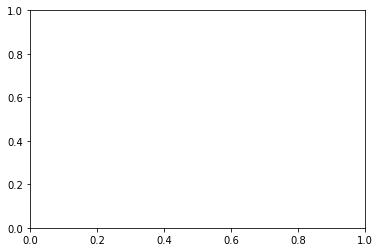

In [19]:
plt.scatter(range(20),y_predict,c = 'r')
plt.scatter(range(20),y_test ,c='g')
plt.show()

In [20]:
plt.plot(hist.history['loss'])
plt.show()

NameError: ignored